### NCAA Supervised Learning ###

In [27]:
import os
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier as DT
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from preprocessing_utils import *
from cv_tuning import run_cross_validation

In [2]:
shuffle_games(datasets_dir='~/Documents/cs7641')

In [3]:
dataset = get_game_data(relative=True, datasets_dir='~/Documents/cs7641')

In [4]:
output = dataset['Team1 result']
label = sklearn.preprocessing.LabelEncoder()
output = label.fit_transform(output)

In [5]:
x = dataset.loc[:, dataset.columns.str.contains('Norm')]
print(x)

     W-L% Norm Diff  SOS Norm Diff  ORtg Norm Diff  DRtg Norm Diff  \
0         -1.613043      -0.792023       -0.992063       -0.391076   
1         -0.416377       0.092479       -0.694517       -0.184744   
2          0.076894      -0.547085        0.735043       -0.614183   
3          0.077640      -0.989772       -0.386843        0.072451   
4          0.482289      -0.047339       -0.198737        0.302416   
..              ...            ...             ...             ...   
562       -0.625587       0.018975       -1.821055        0.000000   
563       -0.031832      -0.125173        0.206388        0.479567   
564        0.097423      -0.629613       -0.292745        0.044765   
565       -0.260264       0.093035       -0.397650       -0.354606   
566        0.232558       0.050988        0.755011       -0.339188   

     FG% Norm Diff  Seed Norm Diff  WL% * SOS Norm Diff  3P% Norm Diff  \
0        -0.978743       -2.000000            -0.899400      -1.393613   
1        -0

In [37]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, output, test_size=0.2, random_state=0)

scale = sklearn.preprocessing.StandardScaler()
pca = PCA(n_components=.99)
scale_pca_pipe = Pipeline([('scaler', scale), ('pca', pca)])
x_train_pca = scale_pca_pipe.fit_transform(x_train)

Starting run 1 out of 50
Starting run 2 out of 50
Starting run 3 out of 50
Starting run 4 out of 50
Starting run 5 out of 50
Starting run 6 out of 50
Starting run 7 out of 50
Starting run 8 out of 50
Starting run 9 out of 50
Starting run 10 out of 50
Starting run 11 out of 50
Starting run 12 out of 50
Starting run 13 out of 50
Starting run 14 out of 50
Starting run 15 out of 50
Starting run 16 out of 50
Starting run 17 out of 50
Starting run 18 out of 50
Starting run 19 out of 50
Starting run 20 out of 50
Starting run 21 out of 50
Starting run 22 out of 50
Starting run 23 out of 50
Starting run 24 out of 50
Starting run 25 out of 50
Starting run 26 out of 50
Starting run 27 out of 50
Starting run 28 out of 50
Starting run 29 out of 50
Starting run 30 out of 50
Starting run 31 out of 50
Starting run 32 out of 50
Starting run 33 out of 50
Starting run 34 out of 50
Starting run 35 out of 50
Starting run 36 out of 50
Starting run 37 out of 50
Starting run 38 out of 50
Starting run 39 out o

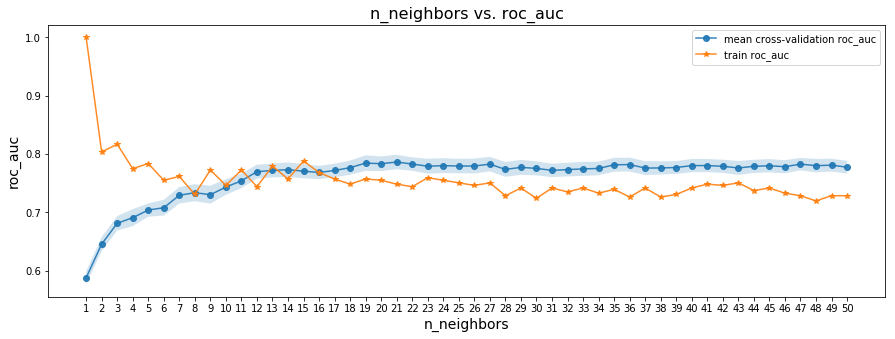

In [38]:
neighbors = [{'n_neighbors':x} for x in range(1, 51)]
cv_results = run_cross_validation(x_train_pca, y_train, neighbors, KNeighborsClassifier, scoring='roc_auc')
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)
y_pred = knn.predict(scale_pca_pipe.transform(x_test))

accuracy_score(y_pred, y_test)

0.6491228070175439

Starting run 1 out of 9
Starting run 2 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Starting run 3 out of 9
Starting run 4 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Starting run 5 out of 9
Starting run 6 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Starting run 7 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Starting run 8 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Starting run 9 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

0.8272703745529834
{'C': 1}
[0.79507929 0.79697558 0.79735554 0.80129517 0.82727037 0.79579098
 0.74400174 0.74650974 0.74650974]


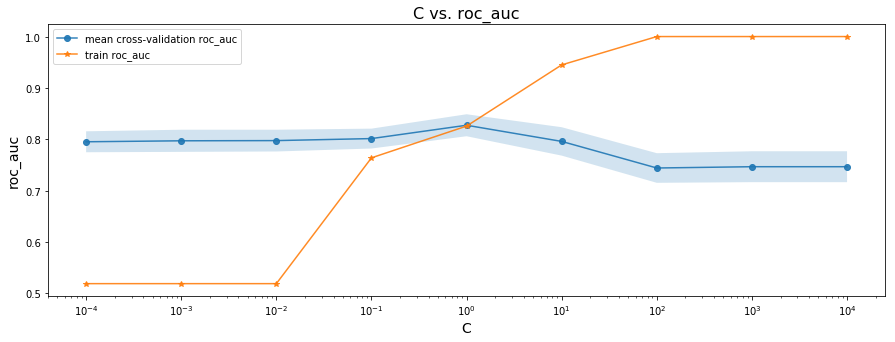

In [17]:
cost = [{'C':x} for x in [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4]]
cv_results = run_cross_validation(x_train_pca, y_train, cost, SVC, scoring='roc_auc', log_plot=True)
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 10
Starting run 2 out of 10
Starting run 3 out of 10
Starting run 4 out of 10
Starting run 5 out of 10
Starting run 6 out of 10
Starting run 7 out of 10
Starting run 8 out of 10
Starting run 9 out of 10
Starting run 10 out of 10
0.8317534820252211
{'gamma': 0.01}
[0.81647727 0.81647727 0.8166749  0.81841591 0.82221556 0.82624224
 0.83175348 0.83127    0.82184383 0.77240613]


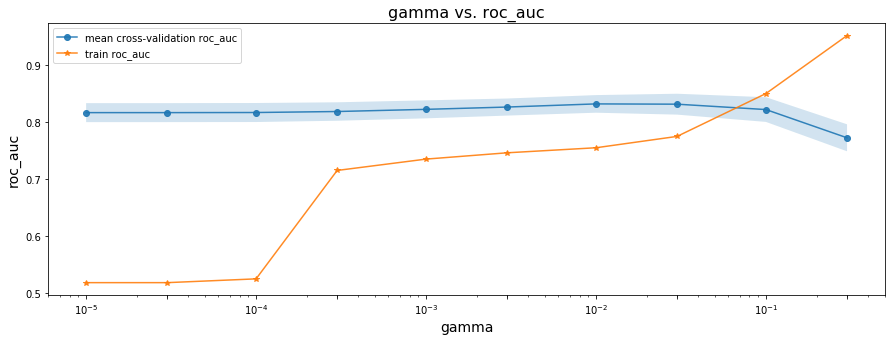

In [19]:
gamma = [{'gamma':x} for x in [1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1]]
cv_results = run_cross_validation(x_train_pca, y_train, gamma, SVC, scoring='roc_auc', log_plot=True)
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

In [41]:
svm = SVC(C=1, gamma=0.01)
svm.fit(x_train_pca, y_train)
y_pred = svm.predict(scale_pca_pipe.transform(x_test))

accuracy_score(y_pred, y_test)

0.7192982456140351

Starting run 1 out of 9
Starting run 2 out of 9
Starting run 3 out of 9
Starting run 4 out of 9
Starting run 5 out of 9
Starting run 6 out of 9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Starting run 7 out of 9
Starting run 8 out of 9
Starting run 9 out of 9
0.8599249482401656
{'C': 100.0}
[0.81484801 0.82021692 0.82585757 0.83937629 0.85800631 0.85991671
 0.85992495 0.85972732 0.85972732]


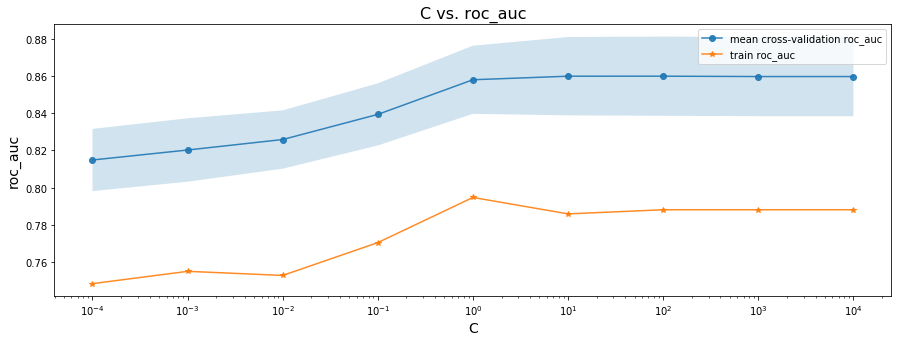

In [28]:
cost = [{'C':x} for x in [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4]]
cv_results = run_cross_validation(x_train_pca, y_train, cost, LogisticRegression, scoring='roc_auc', log_plot=True)
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 11
Starting run 2 out of 11
Starting run 3 out of 11
Starting run 4 out of 11


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Starting run 5 out of 11
Starting run 6 out of 11
Starting run 7 out of 11
Starting run 8 out of 11
Starting run 9 out of 11


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Starting run 10 out of 11
Starting run 11 out of 11
0.858006305288914
{'tol': 1e-06}
[0.85800631 0.85800631 0.85800631 0.85800631 0.85800631 0.85800631
 0.85800631 0.85800631 0.85800631 0.85799689 0.84832133]


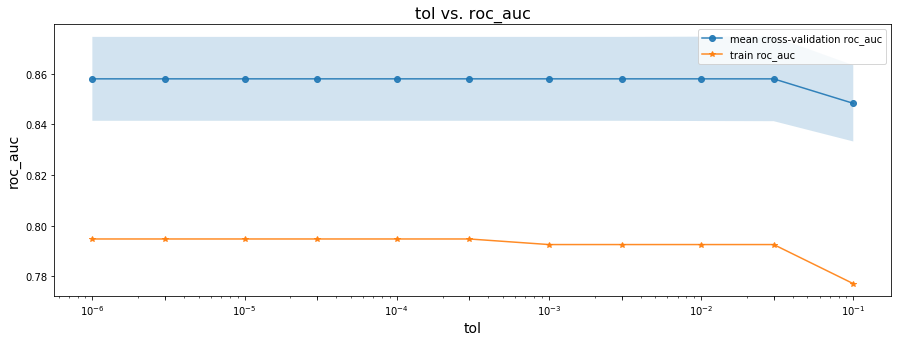

In [30]:
tol = [{'tol':x} for x in [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1]]
cv_results = run_cross_validation(x_train_pca, y_train, tol, LogisticRegression, scoring='roc_auc', log_plot=True)
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

Starting run 1 out of 5
Starting run 2 out of 5
Starting run 3 out of 5
Starting run 4 out of 5
Starting run 5 out of 5
0.8480237154150198
{'solver': 'newton-cg'}
[0.84802372 0.84802372 0.84802372 0.84802372 0.84802372]


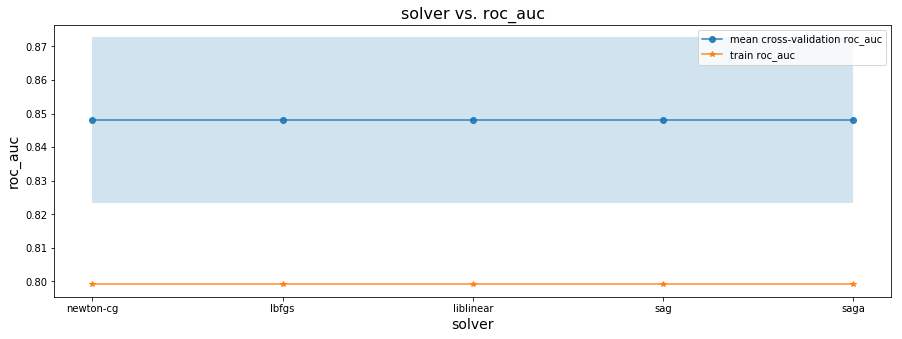

In [53]:
solver = [{'solver':x} for x in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']]
cv_results = run_cross_validation(x_train_pca, y_train, solver, LogisticRegression, scoring='roc_auc')
print(max(cv_results[0]))
print(cv_results[3])
print(cv_results[0])

In [57]:
lr = LogisticRegression(tol=1e-3, solver='lbfgs', C=100)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(scale_pca_pipe.transform(x_test))

accuracy_score(y_pred, y_test)

0.7456140350877193

In [12]:
pca = PCA(n_components=0.99)
pca.fit(x)
x = pca.transform(x)

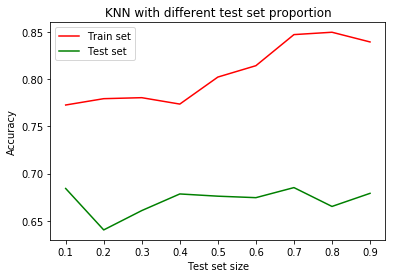

In [13]:
train_score = []
test_score = []
prop_score = []

for prop in range(1, 10):
    test_prop = prop / 10.0
    seeding = 10
    train_in, test_in, train_out, test_out = model_selection.train_test_split(x,
                                                                              output,
                                                                              test_size=test_prop,
                                                                              random_state=seeding)

    # KNN
    knn = KNeighborsClassifier()
    knn.fit(train_in, train_out)
    train_score.append(knn.score(train_in, train_out))
    test_score.append(knn.score(test_in, test_out))
    prop_score.append(test_prop)

plt.plot(prop_score, train_score, 'r', label='Train set')
plt.plot(prop_score, test_score, 'g', label='Test set')
plt.title('KNN with different test set proportion')
plt.xlabel('Test set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

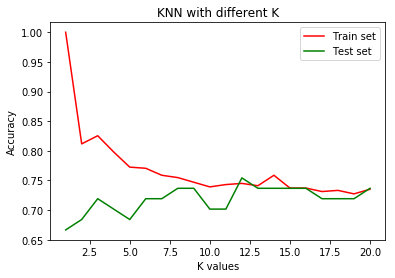

In [14]:
# Test for KNN with different K values
k_values = []
train_score = []
test_score = []
test_prop = 0.1
seeding = 10
train_in, test_in, train_out, test_out = model_selection.train_test_split(x,
                                                                          output,
                                                                          test_size=test_prop,
                                                                          random_state=seeding)
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_in, train_out)
    # print('knn result with k = {}:'.format(i))
    # print(knn.score(train_in, train_out))
    # print(knn.score(test_in, test_out))
    k_values.append(i)
    train_score.append(knn.score(train_in, train_out))
    test_score.append(knn.score(test_in, test_out))
plt.plot(k_values, train_score, 'r', label='Train set')
plt.plot(k_values, test_score, 'g', label='Test set')
plt.title('KNN with different K')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

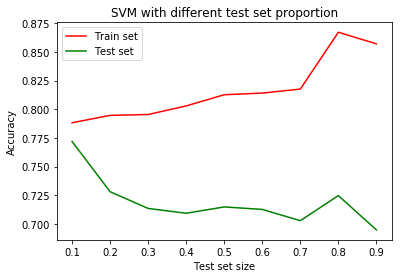

In [15]:
train_score = []
test_score = []
prop_score = []

for prop in range(1, 10):
    test_prop = prop / 10.0
    seeding = 10
    train_in, test_in, train_out, test_out = model_selection.train_test_split(x,
                                                                              output,
                                                                              test_size=test_prop,
                                                                              random_state=seeding)

    SVM_method = SVC(gamma='auto', kernel='rbf')    # kernel value can be changed into 'linear' or 'poly'
    SVM_method.fit(train_in, train_out)
    train_score.append(SVM_method.score(train_in, train_out))
    test_score.append(SVM_method.score(test_in, test_out))
    prop_score.append(test_prop)

plt.plot(prop_score, train_score, 'r', label='Train set')
plt.plot(prop_score, test_score, 'g', label='Test set')
plt.title('SVM with different test set proportion')
plt.xlabel('Test set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
